In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic_train.csv
/kaggle/input/titanic-dataset/Titanic_test.csv


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
test_df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic_test.csv")
train_df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic_train.csv")

# # **Data Preprocessing**

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.drop(columns=['Cabin','Ticket'],axis=1,inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [9]:
# Replace the null with the mean value of the age
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True )
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [10]:
# To find the count of values in the column Embarked
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# replace the null with the the most occuring value in Embarked column 
train_df['Embarked'].fillna('S', inplace = True )
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


In [12]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**Test Data Preprocessing**

In [13]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
test_df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False,False
416,False,False,False,False,True,False,False,False,False,True,False,False


In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [17]:
test_df.drop(columns=['Cabin','Ticket'],axis=1,inplace=True)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,0


In [18]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True )
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,8.0500,S,0


In [19]:
# replacing the null with the mean of the Fare 
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True )
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,8.0500,S,0


In [20]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

# #   **Data Visualisation**

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

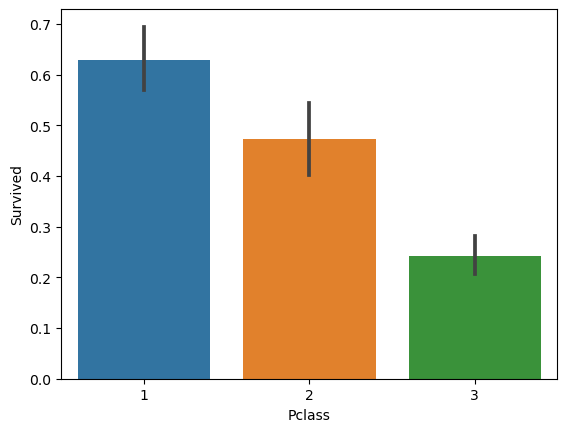

In [21]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

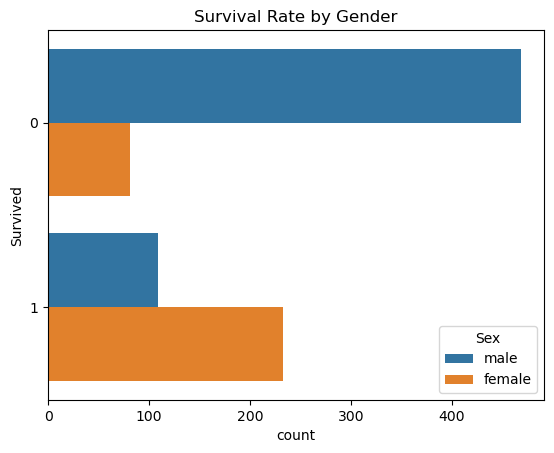

In [22]:
sns.countplot(y='Survived', hue='Sex', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

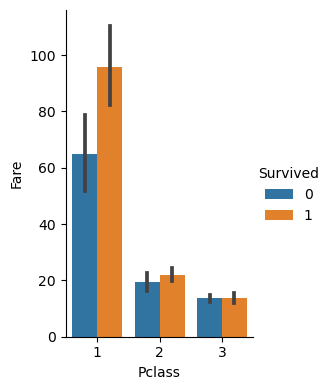

In [23]:
sns.catplot(x="Pclass",y="Fare", hue="Survived",data=train_df, kind="bar",height=4, aspect=.7)

        Survived
Sex             
female      74.0
male        19.0 
 ******************************
              Survived          
                 count      mean
Pclass Sex                      
1      female       94  0.968085
       male        122  0.368852
2      female       76  0.921053
       male        108  0.157407
3      female      144  0.500000
       male        347  0.135447


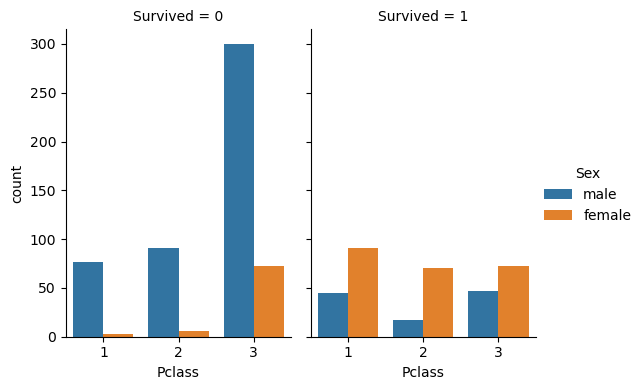

In [24]:
print( round(train_df [['Sex','Survived']].groupby(['Sex']).mean()*100,),'\n',"******************************")
print(train_df [['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).agg(['count','mean']))
sns.catplot(x="Pclass", hue="Sex", col="Survived",data=train_df, kind="count",height=4, aspect=.7)

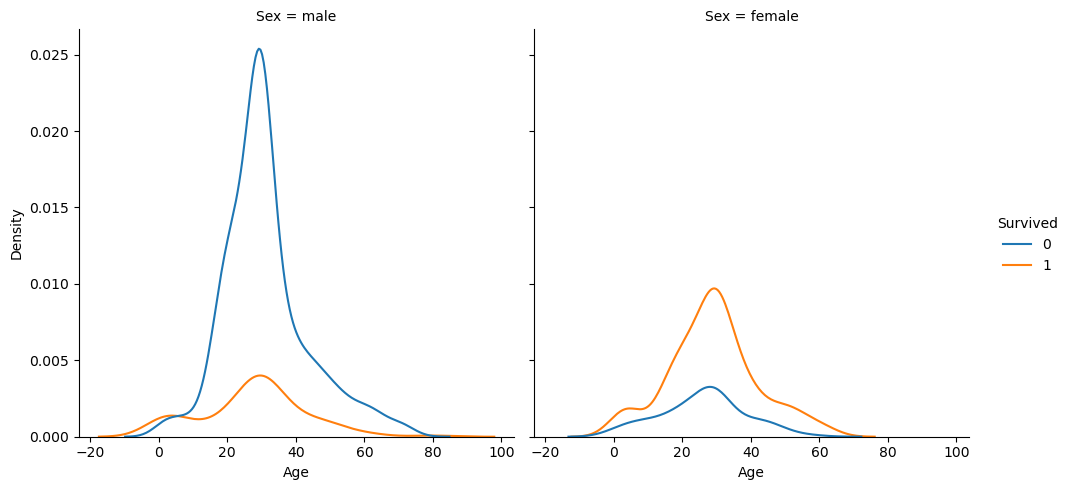

In [25]:
sns.displot(data=train_df,x="Age", hue="Survived", col="Sex",  kind='kde')


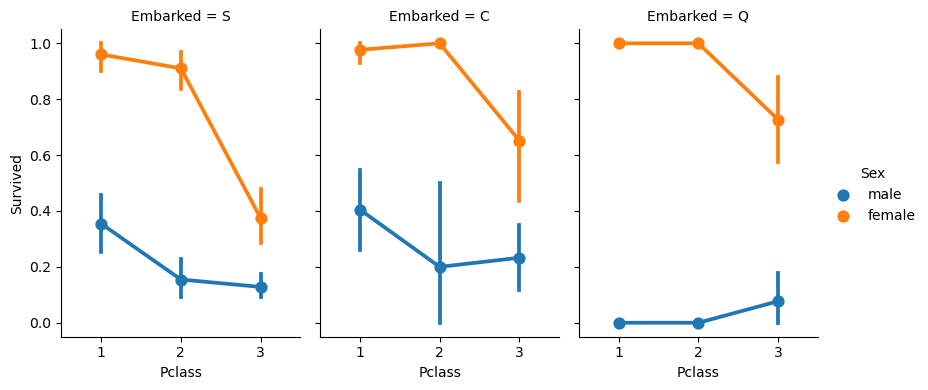

In [26]:
sns.catplot(x="Pclass", y="Survived",hue="Sex", col="Embarked",data=train_df, kind="point",height=4, aspect=.7)

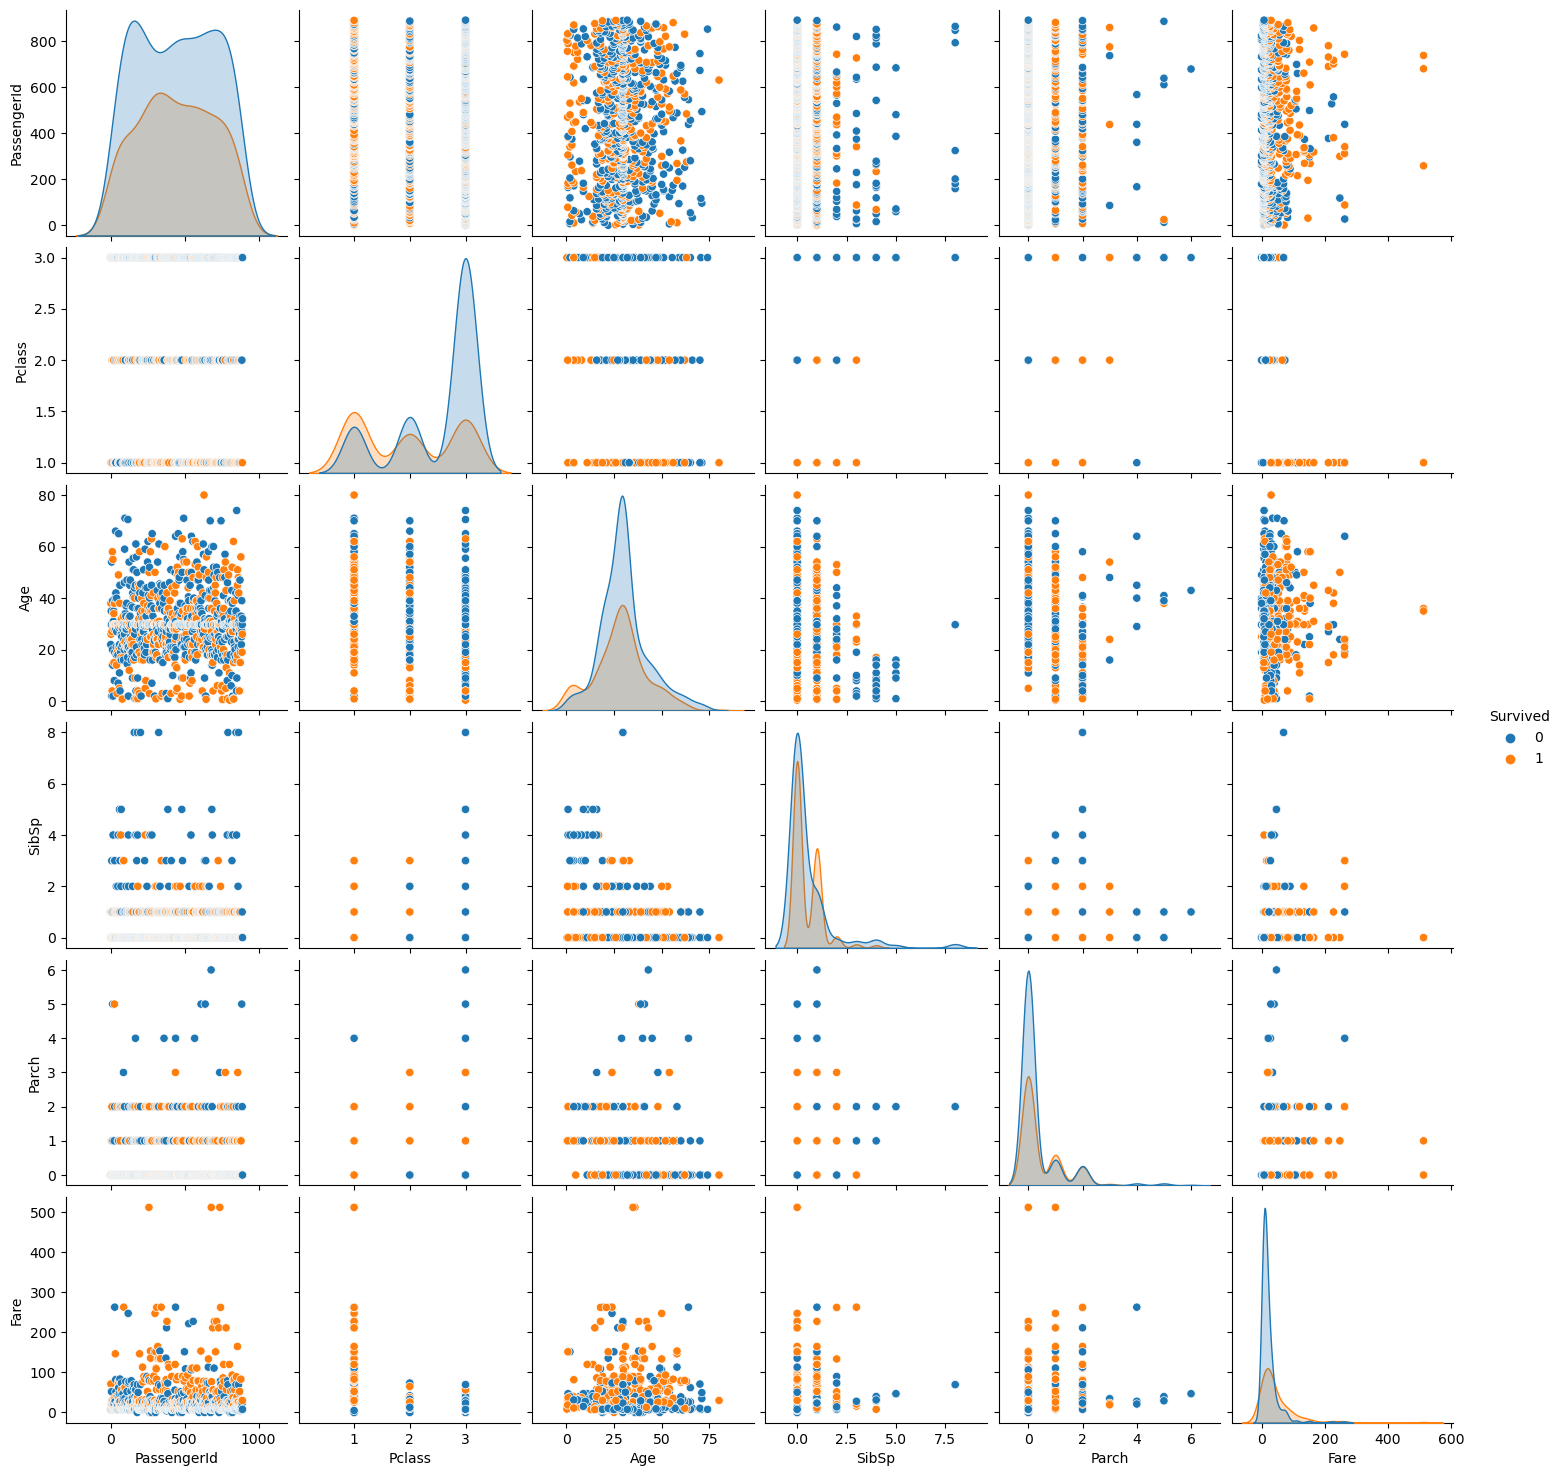

In [27]:
sns.pairplot(train_df, hue='Survived')

In [28]:
train_df['Embarked']=train_df['Embarked'].map({'S':1,'Q':2,'C':3})
train_df['Sex']=train_df['Sex'].map({'male':0,'female':1})
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,3


In [29]:
test_df['Embarked']=test_df['Embarked'].map({'S':1,'Q':2,'C':3})
test_df['Sex']=test_df['Sex'].map({'male':0,'female':1})
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,2,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,3,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,1,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,1,0


In [30]:
train_df['Title']=train_df.Name.str.extract('([A-Za-z]+)\.',expand=False)
train_df=train_df.drop(columns='Name')

In [31]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [32]:
train_df['Title'] = train_df['Title'].replace(['Dr','Rev','Mlle','Major','Col','Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'],'Others')
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.000000,1,0,7.2500,1,Mr
1,2,1,1,1,38.000000,1,0,71.2833,3,Mrs
2,3,1,3,1,26.000000,0,0,7.9250,1,Miss
3,4,1,1,1,35.000000,1,0,53.1000,1,Mrs
4,5,0,3,0,35.000000,0,0,8.0500,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,1,Others
887,888,1,1,1,19.000000,0,0,30.0000,1,Miss
888,889,0,3,1,29.699118,1,2,23.4500,1,Miss
889,890,1,1,0,26.000000,0,0,30.0000,3,Mr


In [33]:
train_df.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

In [34]:
train_df['Title']=train_df['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Others':4})
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.000000,1,0,7.2500,1,0
1,2,1,1,1,38.000000,1,0,71.2833,3,2
2,3,1,3,1,26.000000,0,0,7.9250,1,1
3,4,1,1,1,35.000000,1,0,53.1000,1,2
4,5,0,3,0,35.000000,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,1,4
887,888,1,1,1,19.000000,0,0,30.0000,1,1
888,889,0,3,1,29.699118,1,2,23.4500,1,1
889,890,1,1,0,26.000000,0,0,30.0000,3,0


In [35]:
test_df['Title']=test_df.Name.str.extract('([A-Za-z]+)\.',expand=False)
test_df=test_df.drop(columns='Name')

In [36]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [37]:
test_df['Title'] = test_df['Title'].replace(['Dr','Col','Rev','Ms','Dona'],'Others')
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,892,3,0,34.50000,0,0,7.8292,2,0,Mr
1,893,3,1,47.00000,1,0,7.0000,1,1,Mrs
2,894,2,0,62.00000,0,0,9.6875,2,0,Mr
3,895,3,0,27.00000,0,0,8.6625,1,0,Mr
4,896,3,1,22.00000,1,1,12.2875,1,1,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,1,0,Mr
414,1306,1,1,39.00000,0,0,108.9000,3,1,Others
415,1307,3,0,38.50000,0,0,7.2500,1,0,Mr
416,1308,3,0,30.27259,0,0,8.0500,1,0,Mr


In [38]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: Title, dtype: int64

In [39]:
test_df['Title']=test_df['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Others':4})
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,892,3,0,34.50000,0,0,7.8292,2,0,0
1,893,3,1,47.00000,1,0,7.0000,1,1,2
2,894,2,0,62.00000,0,0,9.6875,2,0,0
3,895,3,0,27.00000,0,0,8.6625,1,0,0
4,896,3,1,22.00000,1,1,12.2875,1,1,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,1,0,0
414,1306,1,1,39.00000,0,0,108.9000,3,1,4
415,1307,3,0,38.50000,0,0,7.2500,1,0,0
416,1308,3,0,30.27259,0,0,8.0500,1,0,0


# **Correlation matrix**

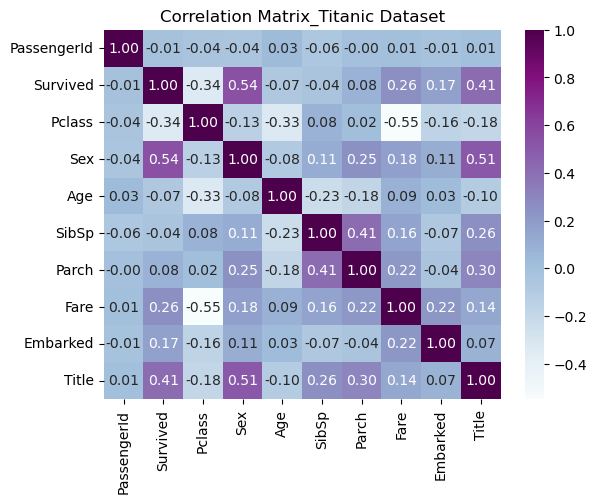

In [40]:
# The correlation matrix
sns.heatmap(train_df.corr(),cmap="BuPu", annot=True, fmt='.2f')
plt.title('Correlation Matrix_Titanic Dataset')
plt.show()

In [41]:
#From the above correlation matrix the passengerid,SibSp,Parch doesn't make any correlation with respect to the survived, so dropping those columns
train_df.drop(columns=['PassengerId'],inplace=True,axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.000000,1,0,7.2500,1,0
1,1,1,1,38.000000,1,0,71.2833,3,2
2,1,3,1,26.000000,0,0,7.9250,1,1
3,1,1,1,35.000000,1,0,53.1000,1,2
4,0,3,0,35.000000,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1,4
887,1,1,1,19.000000,0,0,30.0000,1,1
888,0,3,1,29.699118,1,2,23.4500,1,1
889,1,1,0,26.000000,0,0,30.0000,3,0


In [42]:
#test_df.drop(columns=['Survived'],inplace=True,axis=1)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,892,3,0,34.50000,0,0,7.8292,2,0,0
1,893,3,1,47.00000,1,0,7.0000,1,1,2
2,894,2,0,62.00000,0,0,9.6875,2,0,0
3,895,3,0,27.00000,0,0,8.6625,1,0,0
4,896,3,1,22.00000,1,1,12.2875,1,1,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,1,0,0
414,1306,1,1,39.00000,0,0,108.9000,3,1,4
415,1307,3,0,38.50000,0,0,7.2500,1,0,0
416,1308,3,0,30.27259,0,0,8.0500,1,0,0


# **Normalisation using Numeric data Preprocessing**

In [43]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Age', 'Fare']
scaler = MinMaxScaler()
scaler.fit(train_df[numerical_features])
train_df[numerical_features] = scaler.transform(train_df[numerical_features])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0.271174,1,0,0.014151,1,0
1,1,1,1,0.472229,1,0,0.139136,3,2
2,1,3,1,0.321438,0,0,0.015469,1,1
3,1,1,1,0.434531,1,0,0.103644,1,2
4,0,3,0,0.434531,0,0,0.015713,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.334004,0,0,0.025374,1,4
887,1,1,1,0.233476,0,0,0.058556,1,1
888,0,3,1,0.367921,1,2,0.045771,1,1
889,1,1,0,0.321438,0,0,0.058556,3,0


In [44]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Age', 'Fare']
scaler = MinMaxScaler()
scaler.fit(test_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,892,3,0,0.452723,0,0,0.015282,2,0,0
1,893,3,1,0.617566,1,0,0.013663,1,1,2
2,894,2,0,0.815377,0,0,0.018909,2,0,0
3,895,3,0,0.353818,0,0,0.016908,1,0,0
4,896,3,1,0.287881,1,1,0.023984,1,1,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0.396975,0,0,0.015713,1,0,0
414,1306,1,1,0.512066,0,0,0.212559,3,1,4
415,1307,3,0,0.505473,0,0,0.014151,1,0,0
416,1308,3,0,0.396975,0,0,0.015713,1,0,0


# **Feature Extraction**

In [45]:
# # Separate features and target,select features  
# data = train_df.values
# #test_data = test_df.values
# X = data[:,1:9]
# Y = data[:,0]
# #X_test = test_data[:,1:9]
# #print(X_test)

In [46]:
X_train=train_df.iloc[:,1:9]
Y_train=train_df.iloc[:,0]
X_test=test_df.drop(columns=['PassengerId','Survived'],axis=1).copy()
print(X_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Title
0         3    0  0.452723      0      0  0.015282         2      0
1         3    1  0.617566      1      0  0.013663         1      2
2         2    0  0.815377      0      0  0.018909         2      0
3         3    0  0.353818      0      0  0.016908         1      0
4         3    1  0.287881      1      1  0.023984         1      2
..      ...  ...       ...    ...    ...       ...       ...    ...
413       3    0  0.396975      0      0  0.015713         1      0
414       1    1  0.512066      0      0  0.212559         3      4
415       3    0  0.505473      0      0  0.014151         1      0
416       3    0  0.396975      0      0  0.015713         1      0
417       3    0  0.396975      1      1  0.043640         3      3

[418 rows x 8 columns]


In [47]:
print(X_train)
print(Y_train)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Title
0         3    0  0.271174      1      0  0.014151         1      0
1         1    1  0.472229      1      0  0.139136         3      2
2         3    1  0.321438      0      0  0.015469         1      1
3         1    1  0.434531      1      0  0.103644         1      2
4         3    0  0.434531      0      0  0.015713         1      0
..      ...  ...       ...    ...    ...       ...       ...    ...
886       2    0  0.334004      0      0  0.025374         1      4
887       1    1  0.233476      0      0  0.058556         1      1
888       3    1  0.367921      1      2  0.045771         1      1
889       1    0  0.321438      0      0  0.058556         3      0
890       3    0  0.396833      0      0  0.015127         2      0

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [48]:
Test_survived=test_df.loc[:,'Survived']
Test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# # **Model Training**
 

# **Classification**

 **1.Support Vector Machine(SVM)**

In [49]:
# # # Split the data to train and test dataset.
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [50]:
# import libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# model training
SVCmodel = SVC(kernel='linear')
SVCmodel.fit(X_train, Y_train)


SVC(kernel='linear')

In [51]:
# Predict from the test dataset
Y_predict1 = SVCmodel.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
# accuracy
accuracy_SVM=round(accuracy_score(Y_predict1, Test_survived)*100,2)
accuracy_SVM

95.93

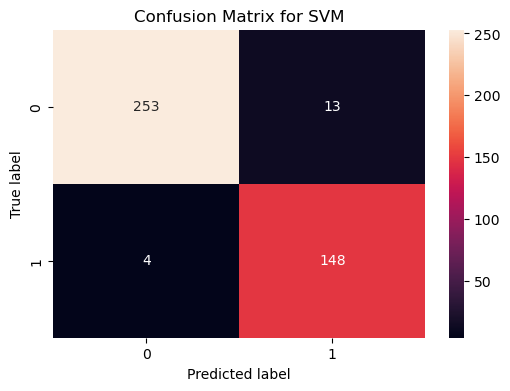

In [52]:
from sklearn.metrics import confusion_matrix
def confusionM(Y_true,Y_predict1,target_names):
#function for confusion matrix visualisation
    cMatrix = confusion_matrix(Test_survived, Y_predict1)
    train_df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(train_df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for SVM')
# get the 3 class names
class_names = train_df.Survived.unique()
confusionM(Test_survived, Y_predict1,class_names)

In [53]:
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.drop(columns="PassengerId", axis=1).copy()

**2.Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predict2 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
accuracy_random_forest = round(accuracy_score(Y_predict2, Test_survived) * 100, 2)
print(accuracy_random_forest)

77.51


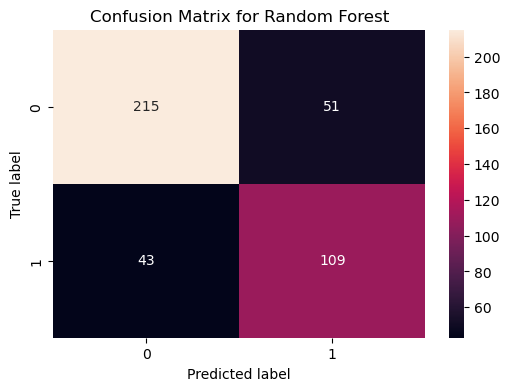

In [55]:
from sklearn.metrics import confusion_matrix
def confusionM(Y_true,Y_predict2,target_names):
#function for confusion matrix visualisation
    cMatrix = confusion_matrix(Test_survived,Y_predict2)
    train_df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(train_df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for Random Forest')
# get the 3 class names
class_names = train_df.Survived.unique()
confusionM(Test_survived,Y_predict2,class_names)

**3.K Nearest Neighbor**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_predict3 = knn.predict(X_test)  
accuracy_knn = round(accuracy_score(Y_predict3, Test_survived) * 100, 2)
accuracy_knn

81.58

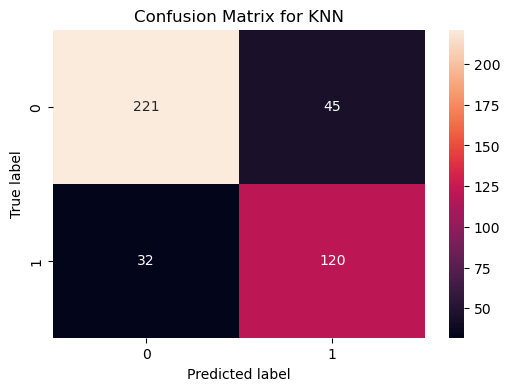

In [57]:
from sklearn.metrics import confusion_matrix
def confusionM(Y_true,Y_predict3,target_names):
#function for confusion matrix visualisation
    cMatrix = confusion_matrix(Test_survived,Y_predict3)
    train_df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(train_df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for KNN')
# get the 3 class names
class_names = train_df.Survived.unique()
confusionM(Test_survived,Y_predict3,class_names)

**4.LogisticRegression**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predict4 = logreg.predict(X_test)
accuracy_logreg = round(accuracy_score(Y_predict4, Test_survived) * 100, 2)
accuracy_logreg

95.45

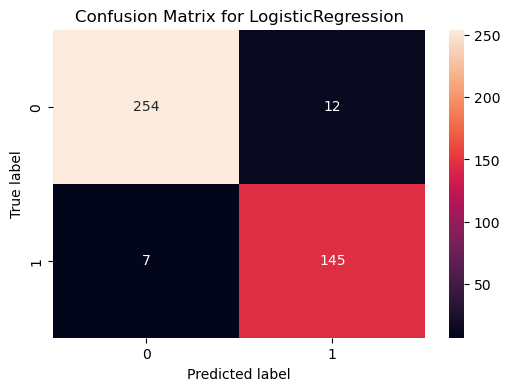

In [59]:
from sklearn.metrics import confusion_matrix
def confusionM(Y_true,Y_predict3,target_names):
#function for confusion matrix visualisation
    cMatrix = confusion_matrix(Test_survived,Y_predict4)
    train_df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(train_df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for LogisticRegression')
# get the 3 class names
class_names = train_df.Survived.unique()
confusionM(Test_survived,Y_predict4,class_names)

In [60]:
results = pd.DataFrame({'Classification_Model': ['SVM','Random Forest', 'KNN', 'Logistic Regression'],
                        'Accuracy': [accuracy_SVM,accuracy_random_forest,accuracy_knn, accuracy_logreg]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df

,Classification_Model
Accuracy,
95.93,SVM
95.45,Logistic Regression
81.58,KNN
77.51,Random Forest


<AxesSubplot:xlabel='Classification_Model', ylabel='Accuracy'>

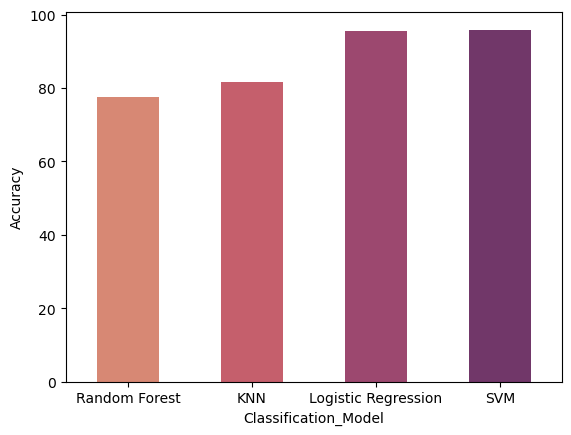

In [61]:
sns.barplot(x='Classification_Model',y='Accuracy',data=results,order=results.sort_values('Accuracy',ascending = True).Classification_Model,width=.5,palette="flare")

# **Clustering**

**1.K-MEANS**

In [62]:
from sklearn.cluster import KMeans
# elbow method to determine the optimal k
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X_train)
    distortions.append(km.inertia_)

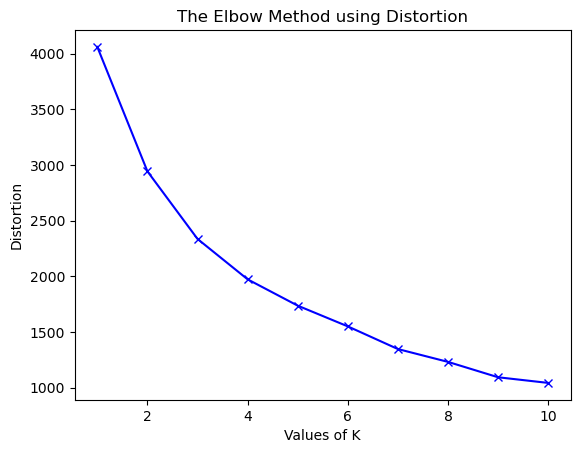

In [63]:
# plot elbow curve
K = range(1, 11)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# **k=3 is the best which matchs the number of class in this dataset (we have 3 classes).**

In [64]:
#  kmeans clustering, train
k = 4
kmeans = KMeans(n_clusters=k, random_state=24)
Y_pred = kmeans.fit_predict(X_train)
Y_pred

array([0, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0,
       1, 0, 3, 2, 1, 3, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1,
       1, 0, 0, 1, 1, 2, 3, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1, 2, 0, 3, 1, 2,
       2, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0,
       0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 3, 2, 2, 2, 0, 0, 0, 3, 2, 0, 1, 0,
       3, 1, 0, 0, 3, 1, 3, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 3, 0, 0,
       1, 0, 3, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1,

In [65]:
# Calculate the accuracy of the clustering
accuracy = accuracy_score(Y_train, Y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100,2))

Accuracy: 54.66%


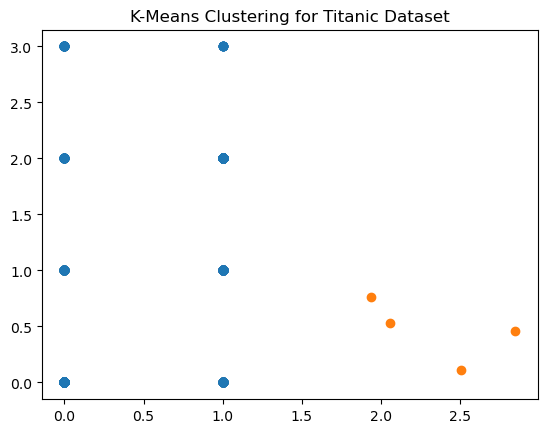

In [66]:
# show each cluster's center 
kmeans.cluster_centers_
# Visualizing the data and center
plt.plot()
plt.title('K-Means Clustering for Titanic Dataset')
plt.scatter(Y_train,Y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.show()